# Utilizando Árvores de Decisão e Random Forrest

## Usando Árvores de Decisão

Consulte a documentação em http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 

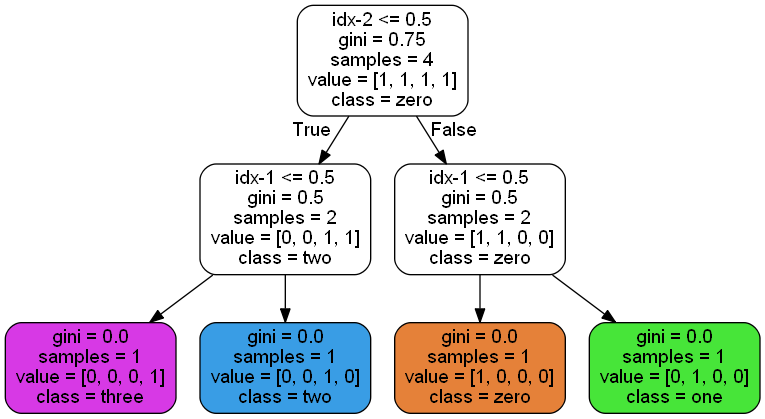

In [1]:
# Exemplo de uma árvore de decisão
from IPython.display import Image
Image(filename='decision-tree.png') 

In [2]:
# Vamos primeiro importar as bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

Vamos utilizar neste exercício um dataset de balança, a qual pode assumir os seguintes resultados:
- R : right (balança aponta para direita)
- L : left (balança aponta para a direita
- B :balanced (aponta para o meio, ou seja, ambos os lados da balança estão balanceados)
           
Os parâmetros que influenciam no resultado são os abaixo, que podem assumir os seguintes valores 1,2,3,4 e 5:
           
2. Left-Weight (peso no lado esquerdo)
3. Left-Distance (distância do peso do lado esquerdo)
4. Right-Weight (peso do lado direito)
5. Right-Distance (distância do peso do lado direito)

In [3]:
# Carregando um dataset contendo dados de uma balança
df = pd.read_csv('balance-scale.csv', sep= ',', header= None)

In [4]:
# Conhecendo os dados
df.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [5]:
# Conhecendo os dados:
df.shape

(625, 5)

In [6]:
df.describe()

,1,2,3,4
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [7]:
# Vamos agora separar os dados variáveis do de resultado
X = df.values[:, 1:5]
Y = df.values[:,0]

In [8]:
# Separando dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [9]:
# Criando a árvore de decisão e treinando com a massa de treinamento
dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [10]:
# Vamos agora prever o resultado a partir de uma entrada aleatória
dtree.predict([[4, 4, 3, 3]])

array(['R'], dtype=object)

Veja que ele previu que o resultado seria R-Right

In [11]:
# Vamos agora calcular as previsões para os dados de teste
y_pred = dtree.predict(X_test)
y_pred

array(['R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R', 'R

In [12]:
# Vamos agora calcular a precisão 
print ("Precisão com Entropy = ", accuracy_score(y_test,y_pred)*100)

Precisão com Entropy =  70.7446808511


In [13]:
# Vamos realizar o mesmo teste utilizando agora o critério GINI (criterion = "gini")
dtree2 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
dtree2.fit(X_train, y_train)
y_pred = dtree2.predict(X_test)
print ("Precisão com Entropy = ", accuracy_score(y_test,y_pred)*100)

Precisão com Entropy =  73.4042553191


Veja que conseguimos aumentar a acurácia mudando o critério. Será que conseguimos aumentar ainda mais

## Exercício 6

Crie um código parecido com o que criamos no KNN para variar outros parâmetros de árvore de decisão para ver se é possível obter um resultado melhor. Ao final plote um gráfico com os resultados

## Usando Random Forrest

Conheça  mais em http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Esse tipo de algoritmo utiliza várias árvores de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o overfitting. O tamanho da subamostra é sempre o mesmo que o tamanho da amostra de entrada original, mas as amostras são desenhadas com substituição se bootstrap = True (padrão).

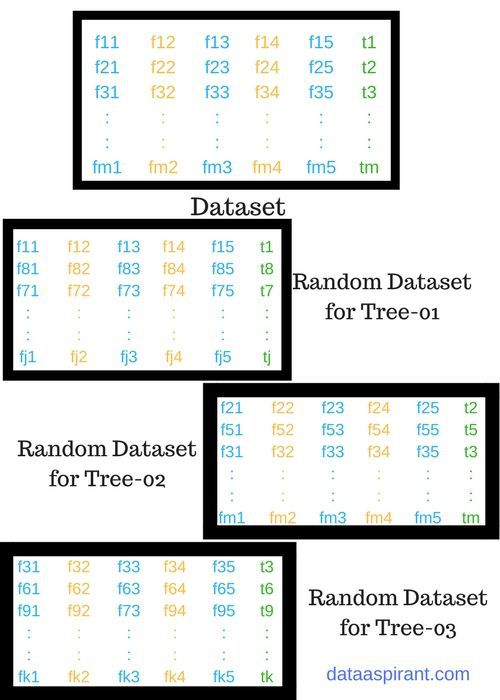

In [14]:
# Veja como funciona o Random Forrest na imagem abaixo. 
# Cada árvore de decisão utiliza um conjunto de dados combinado de maneira diferente
from IPython.display import Image
Image(filename='random-forest.jpg') 

In [15]:
# Vamos primeiramente importar as dependências
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
rf = RandomForestClassifier(n_estimators = 5, criterion = "gini")
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
y_pred = rf.predict(X_test)
y_pred

array(['L', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'L', 'R', 'R', 'L', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'B', 'L', 'R', 'L', 'B',
       'B', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'L', 'B', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'B', 'B', 'B', 'L', 'B', 'R',
       'L', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R',
       'R', 'L', 'R', 'B', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'B', 'L', 'L', 'L', 'L', 'R',
       'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'B', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'B', 'L',
       'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'L', 'B', 'L', 'R', 'B', 'L', 'R', 'R',
       'R', 'B', 'L', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'R', 'B

In [18]:
print ("Acurácia do treinamento = ", accuracy_score(y_train, rf.predict(X_train)))
print ("Acurácia do teste       = ", accuracy_score(y_test, y_pred))
print ("Confusion matrix = ", confusion_matrix(y_test, y_pred))

Acurácia do treinamento =  0.981693363844
Acurácia do teste       =  0.813829787234
Confusion matrix =  [[ 0  8  5]
 [ 7 77  1]
 [ 9  5 76]]


Veja que conseguimos aumentar ainda mais a acurácia utilizando Random Forrest. 

## Exercício 7

Varie o número de estimadores do RandomForrest e veja se consegue aumentar a acurácia ainda mais

Plote um gráfico com os resultados e responda qual foi a melhor acurácia e qual o número de estimadores utilzado

Salve este mesmo Jupyter com outro nome: 05_Random_Forrest_Fulano